In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Понижение размерности

Многие задачи МО подразумевают наличие тысяч, а то и миллионов признаков для каждого обучающего образца. Мало того, что все эти признаки сильно замедляют обучение, но они ещё и создают трудности в поиске хорошего решения. Проблему, возникающую вследствие этого, называют **проклятием размерности** (curse of dimensionality). 

Уменьшение размерности часто вызывает потерю какой-то доли информации (прямо как сжатие изображения в JPEG уменьшает его качество), но при этом оно сильно ускоряет процесс обучения. Более того, процесс уменьшения размерности способен сильно усложнить конвейер обработки данных.

Однако, оно же и способно убрать из данных лишний шум и выбросы, тем самым немного увеличив производительность конечной модели. Но, конечно, в общем случае это совсем не так. Понижение размерности почти всегда ухудшает производительность модели, но сильно ускоряет её обучение. Поэтому, прежде всего, стоит попробовать обучить модель без всякого понижения размерности.

# Проклятие размерности

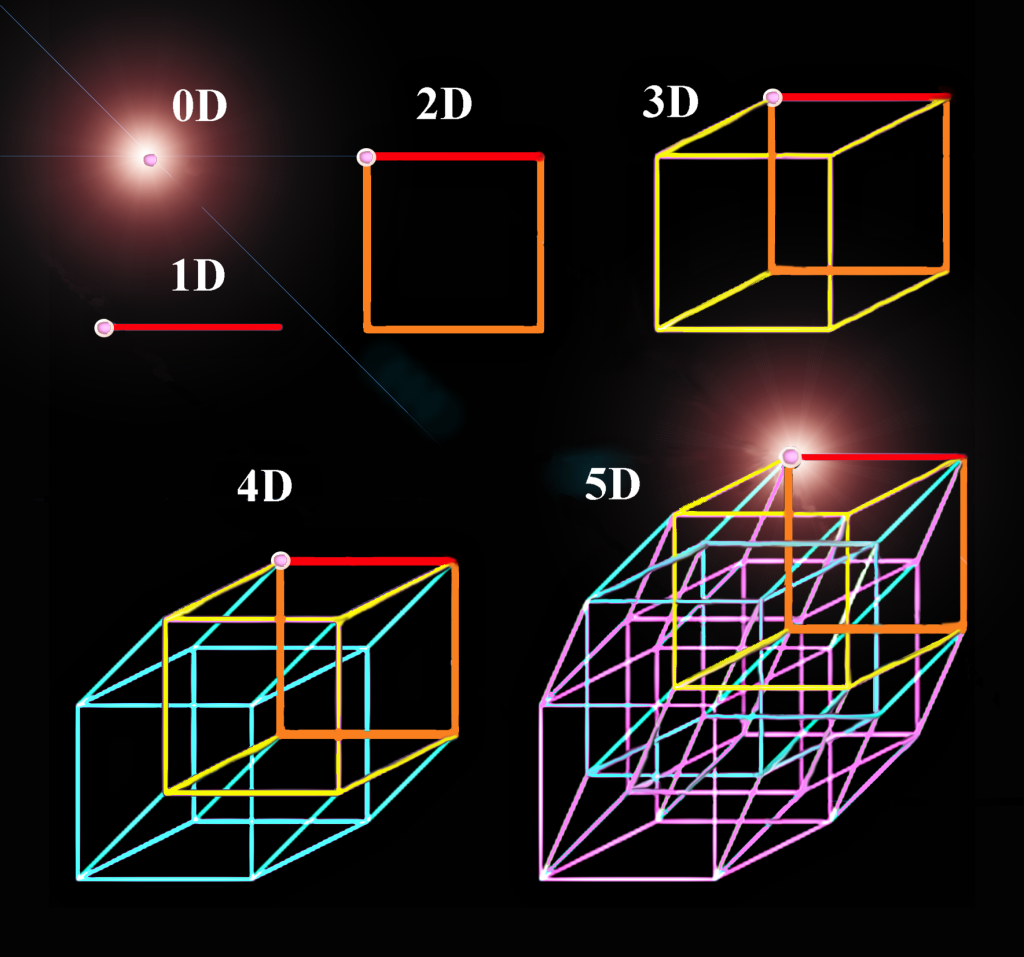

In [2]:
from IPython.display import Image
Image(data='./dimensions.png')

Если бросить случайную точку в единичный квадрат, то у неё есть только 0.004 вероятности находиться на расстоянии меньше, чем 0.001 от границ этого квадрата. Другими словами, почти невероятно, что случайная точка будет экстримально отклонена к одному из измерений. Однако, в аналогичном случае в 10-тысячном измерении, такая вероятность будет больше, чем 0.99999... То есть, в многомерном пространстве большинство точек очень близко к одной из границ.

Ну и собственно, вот в чём здесь загвоздка: если бросить случайно две точки в единичном квадрате (2D), то расстояние между ними в среднем будет около 0.5. Если то же самое сделать в 3D кубе, то около 0.66. А если тот же случай рассмотреть в гиперкубе из 1.000.000 измерений, то расстояние будет около 400. А всё дело в том, что "места" в пространсве из большого числа измерений гораздо больше. Как результат, в высокоразмерных датасетах риск того, что данные сильно разреженные - высок. И два обучающих образца могут находиться сильно далеко друг от друга. Поэтому, чем больше измерений в наборе данных, тем больше велик шанс, что модель переобучится на данных.

Но, естественно, самым очевидным решением проклятия размерности является **увеличение набора данных**, ведь так можно достигнуть высокой плотности обучающих образцов. К сожалению, на практике число образцов, которое необходимо для достижения нормальной плотности данных, возрастает экспоненциально с количеством измерений.

# Основные подходы к понижению размерности

Существуют два основных подхода к понижению размерности: **проекция** и **manifold обучения** (многообразное).

## Проекция

В большинстве реальных задач образцы в пространстве не распределяются по всем измерениям равномерно: многие признаки почти постоянны, пока другие сильно коррелируют друг с другом. Поэтому, почти все образцы часто лежат внутри или близко к подпространству более низкой размерности от всего многомерного пространства.

Продемонстрируем пример на основе 3D графика.

In [3]:
m = 100
w1, w2 = 0.3, 0.5
noise = 0.1

angles = np.random.rand(m) * 2 * np.pi - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Для того, чтобы можно было визуализировать плоскость, необходимо применить метод PCA, который мы рассмотрим далее.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [5]:
pca.components_

array([[-0.7441267 , -0.47792466, -0.46675848],
       [ 0.6140902 , -0.76443838, -0.19628345]])

In [6]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

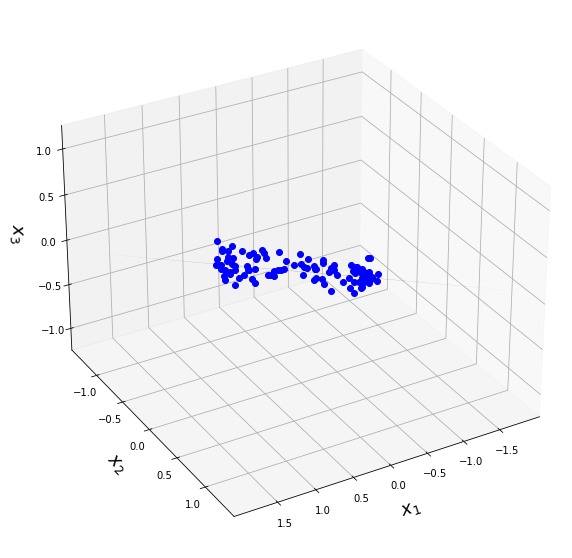

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=1)
ax.plot_surface(x1, x2, z, alpha=0.4, color="k")

ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)

ax.view_init(30, 60)

plt.show()

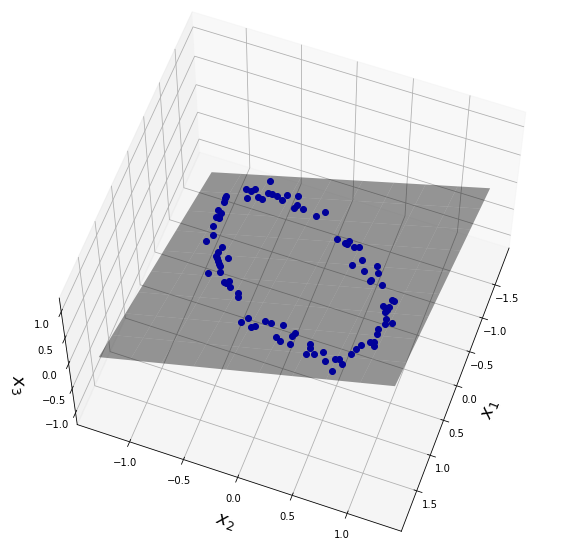

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=1)
ax.plot_surface(x1, x2, z, alpha=0.4, color="k")

ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)

ax.view_init(60, 20)

plt.show()

Мы можем заметить из графика, что точки очень хорошо ложатся на двумерную плоскость, а значит мы можем спроецировать их ровно на неё же, просто проведя перпендикуляры к этой плоскости. И вуаля, мы уменьшили размерность с 3 до 2.

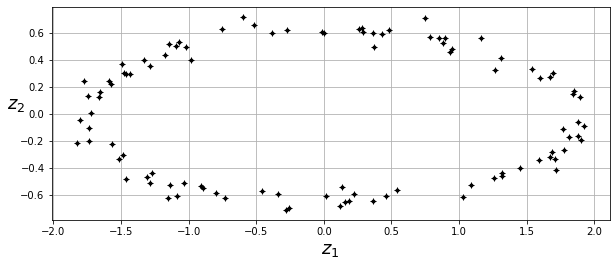

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.grid(True)

## Manifold обучение

Однако, проекция не всегда самый лучший подход к уменьшению размерности. В большинстве случаев подпространство может закручиваться или различными способами быть кое-как извернуто и т.п.

In [46]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2)

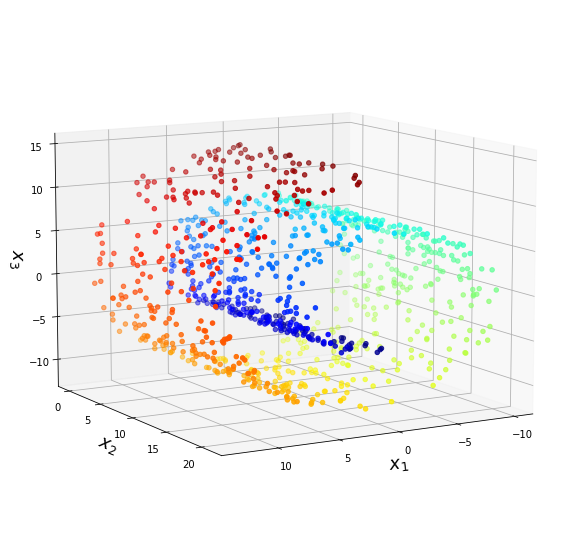

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.jet)
ax.view_init(10, 60)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.show()

Тогда, конечно, просто спроецировать все точки на одну плоскость (просто выкинув $x_3$) будет не самым лучшим вариантом, ибо все слои такого ролла просто наложатся друг на друга. А самым верным решением тут будет - раскрутить этот ролл в виде прямоугольника - в одну полосу.

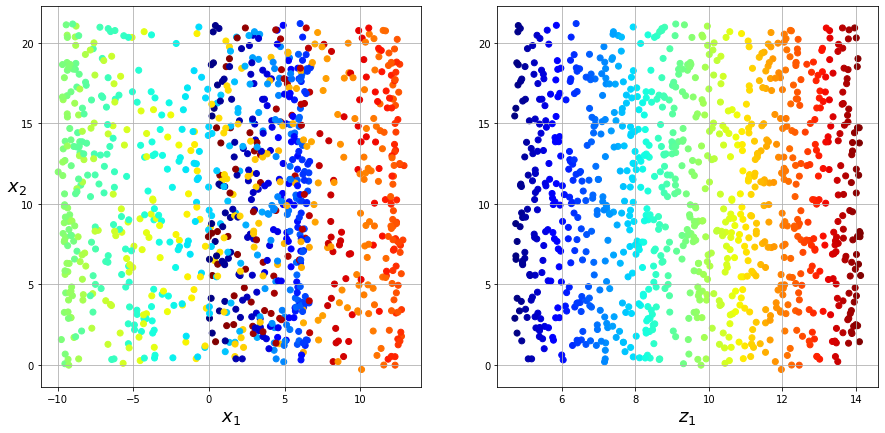

In [12]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.jet)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.jet)
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

В сравнении показан пример того же 3D графика, но сверху.

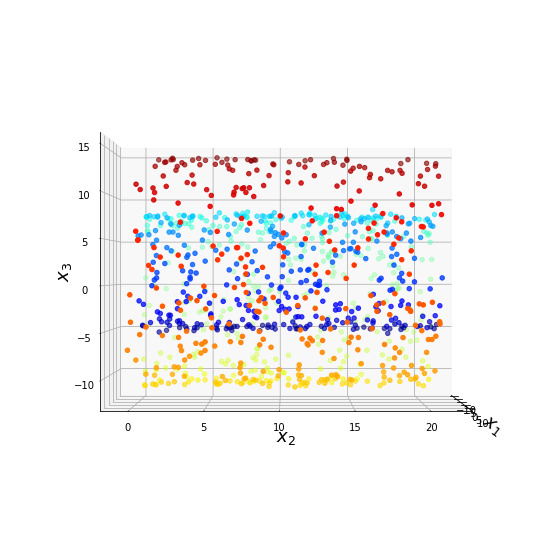

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.jet)
ax.view_init(0, 0)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.show()

Швейцарский ролл - это самый типичный пример **двумерного многообразия**. Проще говоря, двумерное многообразие - это 2D фигура, которую можно как угодно сжимать и крутить в пространстве более высокой размерности. 

Многие алгоритмы понижения размерности работают, моделируя подобные **многообразия**, на котором находятся обучающие образцы. Весь этот процесс называется **обучением на основе многообразий** (**manifold learning**). Он основывается на так называемом **предположении о многообразии**, который также называется **гипотезой**: она утверждает, что большинство реальных многомерных наборов данных лежат достаточно близко к многообразию гораздо меньшей размерности (lower-dimensional manifold). Это утверждение очень часто доказывается эмпирически.

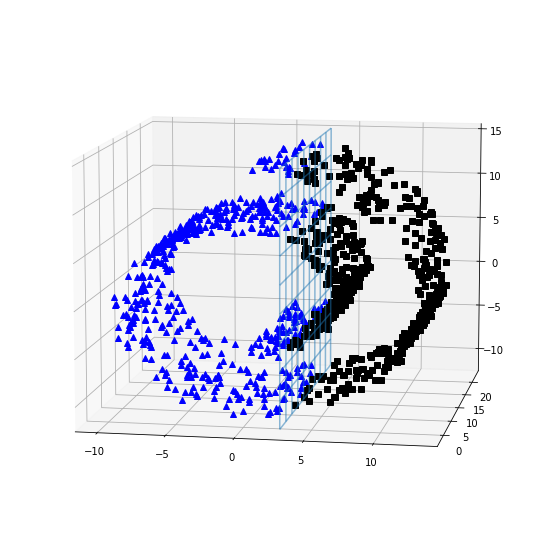

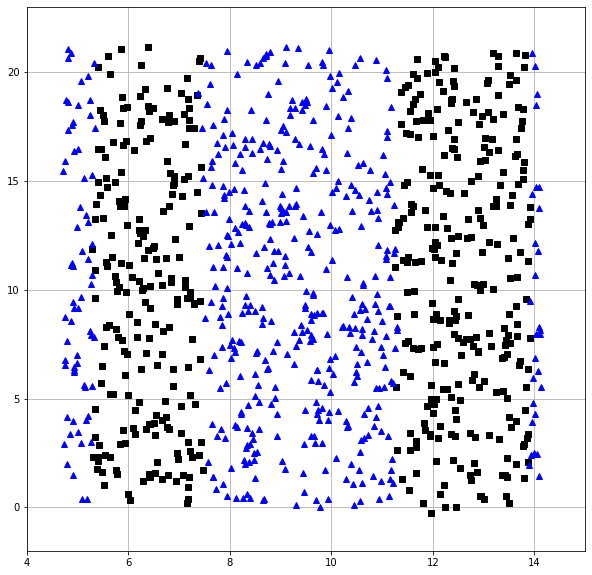

In [14]:
axes = [-12, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d')

pos_class = X[:, 0] > 3
X_pos = X[pos_class]
X_neg = X[~pos_class]
ax.view_init(10, -80)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], 'b^')
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], 'ks')
ax.plot_wireframe(3, x2, x3, alpha=0.5)

plt.show()

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

plt.plot(t[pos_class], X[pos_class, 1], "ks")
plt.plot(t[~pos_class], X[~pos_class, 1], "b^")
plt.axis([4, 15, axes[2], axes[3]])
plt.grid(True)

Тем не менее, указанное предположение не всегда поддерживается. Скажем, на рисунке граница решений расположена в месте
х = 3. Такая граница решений выглядит очень простой в исходном трехмерном пространстве, но более сложной в развернутом многообразии.

# PCA

**Анализ главных компонент** (Principal Component Analysis) - самый популярный алгоритм понижения размерности. Сначала он определяют гиперплоскость, которая наиболее близко лежит к данным, а затем проецирует данные на нее.

Прежде чем проецировать данные на гиперплоскость меньшей размерности, необходимо определить сначала правильную гиперплоскость.

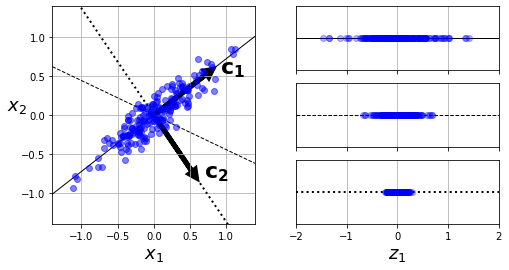

In [2]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

К примеру, слева - наши данные, а справа - проекции этих данных на три произвольные оси. Как можно заметить, только непрерывная линия является здесь наилучшим вариантом в плане проекции, т.е. именно эта линия обеспечивает максимальную дисперсию точек, в то время как остальные две линии проецируют эти данные с меньшей дисперсией

Выглядит вполне резонно - выбирать ту ось, которая сохраняет максимум дисперсии, так как это позволяет потерять наименьшее количество информации по сравнению с другими проекциями. Ну и всё так же резонно выбирать ось, которая минимизирует среднее отклонение между оригинальным набором данных и его проекцией на эту ось. Именно такая простая идея заключена в PCA.

## Главные компоненты

PCA определяет подходящую ось по наибольшей дисперсии в обучающем наборе. Затем он также находим вторую ось, перпендикулярную первой, которая соответствует наибольшему количеству оставшейся дисперсии. Если это многомерный набор данных, то PCA находит третью такую ось, затем четверту, пятую и т.д., пока количество измерений не закончится. 

$i$-ую ось называют $i$-ым **главным компонентом** (PC) набора данных.

Как находить главные компоненты обучающего датасета? Для этого существует стандартный прием матричного разложения под названием **сингулярное разложение** (singular value decomposition - SVD), который проводит декомпозицию матрицы X в скалярное произведение трех матриц $U\cdot\Sigma\cdot V^T$, где $V$ содержит все искомые главные компоненты:

$$V =\Bigg(c_1c_2...c_n\Bigg)$$

Покажем как вычисляются главные компоненты с помощью SVD. За основу возьмём данные, которые мы рассматривали ранее.

In [3]:
m = 100
w1, w2 = 0.3, 0.5
noise = 0.1

angles = np.random.rand(m) * 2 * np.pi - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

PCA предполагает, что данные центрированы относительно начала. Sklearn центрирует все сам, однако если делать это через np.linalg.svd, нужно центрировать самостоятельно.

In [4]:
centered = X - X.mean(axis=0)
U, S, V = np.linalg.svd(centered)

In [18]:
c1 = V.T[:, 0]
c2 = V.T[:, 1]

In [5]:
V.T

array([[ 0.75667611, -0.60783799, -0.24077841],
       [ 0.45904699,  0.75617818, -0.46633723],
       [ 0.46552886,  0.24233764,  0.85120817]])

После идентификации всех PC можно понизить размерность набора данных до $d$ измерений за счёт его проецирования на гиперплоскость, определенную первыми $d$ компонентами. Тогда проекция гарантированно будет сохранять максимально возможную дисперсию.

Чтобы спроецировать обучающий набор на гиперплоскость, можно просто подсчитать скалярное произведение матрицы X обучающего набора $W_d$, которая определена как матрица, содержащая первые $d$ PС.

$$X_{d-проекция} = X\cdot W_d$$

In [6]:
W2 = V.T[:, :2]
X2 = centered.dot(W2)

In [8]:
X2[:10]

array([[-0.71147193, -0.47518959],
       [-0.34312376,  0.78649242],
       [ 1.60748696,  0.43047774],
       [-1.71467371,  0.04653735],
       [-0.99964991, -0.57582835],
       [-1.10940102,  0.51913808],
       [ 0.56153489, -0.55218047],
       [-1.15013202, -0.471254  ],
       [ 0.21120115, -0.59098234],
       [-1.6547227 ,  0.19587901]])

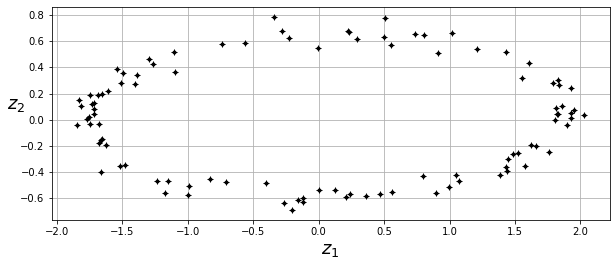

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2[:, 0], X2[:, 1], "k+")
ax.plot(X2[:, 0], X2[:, 1], "k.")
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.grid(True)

Теперь проделаем ту же работу с использованием класс `PCA` из sklearn и убедимся, что результаты будут одинаковыми.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X)

In [23]:
X2_pca[:10]

array([[-0.71147193, -0.47518959],
       [-0.34312376,  0.78649242],
       [ 1.60748696,  0.43047774],
       [-1.71467371,  0.04653735],
       [-0.99964991, -0.57582835],
       [-1.10940102,  0.51913808],
       [ 0.56153489, -0.55218047],
       [-1.15013202, -0.471254  ],
       [ 0.21120115, -0.59098234],
       [-1.6547227 ,  0.19587901]])

Заметим, что PCA даёт ровно такие же значения главных компонентов, за исключением того факта, что знаки у значений разные - это связано с тем, о чём мы говорили ранее - оси могут менять направление.

Получить доступ к главным компонентам можно так:

In [24]:
pca.components_.T

array([[ 0.75667611, -0.60783799],
       [ 0.45904699,  0.75617818],
       [ 0.46552886,  0.24233764]])

**Коэффициент объясненной дисперсии** (explained variance ratio) - доля дисперсии набора данных, которая лежит вдоль оси каждого главного компонента.

In [27]:
pca.explained_variance_ratio_

array([0.90065537, 0.09073205])

90% дисперсии лежит на первой оси, 9% лежит на второй оси и менее 1% на третьей. Поэтому, логично, что в понижении размерности третья ось не играет роли.

Вместо выбора произвольного числа измерений лучше выбирать такое количество измерений, которое соответствует достаточно большой порции дисперсии (>95%). Ну а в случае визуализации, конечно, эта рекоммендация не работает.

Найти оптимальное количество измерений можно с помощью:

In [25]:
from sklearn.datasets import make_classification

In [26]:
X_cl, _ = make_classification(n_samples=2000, n_features=250, n_informative=110, n_redundant=35)

In [27]:
X_cl.shape

(2000, 250)

In [28]:
pca = PCA(n_components=200)
pca.fit(X_cl)

PCA(n_components=200)

In [29]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.06586305, 0.12865808, 0.18814017, 0.24151117, 0.29137414,
       0.33919866, 0.382583  , 0.42520792, 0.46704113, 0.50412749,
       0.53987986, 0.57257919, 0.60257288, 0.63106263, 0.6580984 ,
       0.68376967, 0.70774463, 0.72962249, 0.75136375, 0.77032407,
       0.7886893 , 0.80597507, 0.8223018 , 0.83791998, 0.85280802,
       0.86717957, 0.87938264, 0.89136842, 0.90235253, 0.91256887,
       0.92214081, 0.93050061, 0.93794279, 0.9447613 , 0.95067151,
       0.95207852, 0.95334975, 0.95459206, 0.95578251, 0.95692383,
       0.95805285, 0.95913899, 0.960211  , 0.96128168, 0.96229192,
       0.96327876, 0.96424962, 0.96520793, 0.96614188, 0.96705119,
       0.96794621, 0.96882436, 0.96968442, 0.97052955, 0.97136659,
       0.97218192, 0.9729816 , 0.97376813, 0.97454385, 0.97530369,
       0.97605568, 0.97678825, 0.97751209, 0.97822005, 0.97891588,
       0.9795952 , 0.98026286, 0.98091662, 0.98156018, 0.98218303,
       0.98279581, 0.98338742, 0.98397465, 0.98455275, 0.98512

In [31]:
dims = np.argmax(cumsum >= 0.97) + 1
dims

54

Однако, можно установить n_components в промежутке от 0 до 1, указывающее долю дисперсии, которую желательно сохранить.

In [32]:
pca = PCA(n_components=0.97)
pca.fit(X_cl)

PCA(n_components=0.97)

In [33]:
len(pca.components_)

54

Или как вариант можно вычертить график объяснённой дисперсии как функцию от количества измерений. На графике стоит найти крутой изгиб и после него выбрать количество измерений, которое не приведет к большой потере информации.

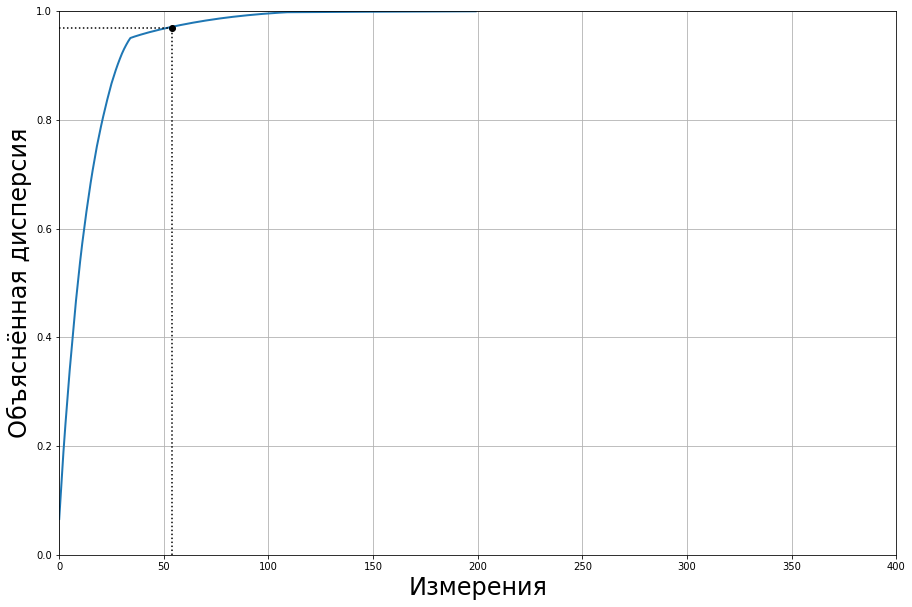

In [34]:
plt.figure(figsize=(15,10))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 400, 0, 1])
plt.xlabel("Измерения", fontsize=24)
plt.ylabel("Объяснённая дисперсия", fontsize=24)
plt.plot([dims, dims], [0, 0.97], "k:")
plt.plot([0, dims], [0.97, 0.97], "k:")
plt.plot(dims, 0.97, "ko")
plt.grid(True)
plt.show()

# PCA для сжатия

Возвращаясь к тому, что алгоритмы понижения размерности способны терять какое-то количество информации при сжатии, следует привести пример с набором MNIST.

In [35]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [36]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dims = np.argmax(cumsum >= 0.97) + 1

In [38]:
dims

213

Если применить PCA к набору MNIST, сохранив 97% его дисперсии, то каждый образец будет иметь около 213 признаков, вместо исходных 784. Тогда, набор данных сократил почти 3/4 своего объёма. Это позволяет сильно сократить время обучения, к примеру, для алгоритма SVM.

Но набор можно точно так же возвратить назад к 784 измерениям, применив обратную трансформацию проекции PCA. Тогда это приведет к небольшой утрате информации (ведь 3% дисперсии мы просто отбросили).

Тогда средний квадрат расстояния между первоначальными и восстановленными данными называется **ошибкой восстановления** (reconstruction error).

In [41]:
pca = PCA(n_components=dims)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [42]:
def draw_image(images, images_per_row=5):
    for index, image in enumerate(images):
        image = image.reshape(28, 28)
        n_rows = (len(images)-1) // images_per_row + 1
        plt.subplot(n_rows, images_per_row, index+1)
        plt.imshow(image, cmap=mpl.cm.binary)
        plt.axis(False)

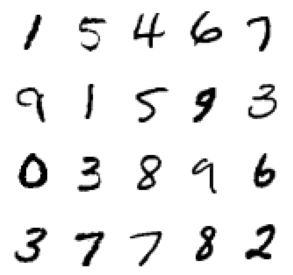

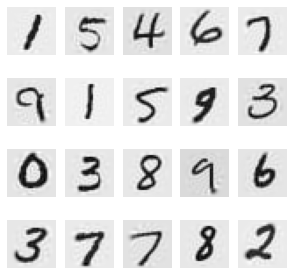

In [43]:
plt.figure(1, figsize=(5, 5))
draw_image(X_train[:20])
plt.figure(2, figsize=(5, 5))
draw_image(X_recovered[:20])

А восстановить набор можно так:

$$X_{восстановленный}=X_{d-проекция}\cdot W_d^T$$

# Рандомизированный PCA

Если установить гиперпараметр **svd_solver** в значение "randomized", то sklearn будет использовать стохастический алгоритм, называемый Randomized PCA, который быстро находит аппроксимацию первых d главных компонентов.

Его вычислительная мощность:

$$O(m\cdot d^2) + O(d^3)$$

вместо полного 

$$O(m\cdot n^2) + O(n^3)$$

Тогда если d сильно меньше n, то процесс понижения размерности будет куда быстрее.

По-умолчанию svd_solver стоит в значение auto: sklearn сам использует такой алгоритм, если m или n больше, чем 500 и d меньше, чем 80% от m и n. В противном случае, используется полный SVD подход.

In [44]:
%%time
pca = PCA(n_components=dims, svd_solver='randomized')
X_reduced = pca.fit_transform(X_train)

CPU times: user 28.5 s, sys: 13.2 s, total: 41.7 s
Wall time: 5.81 s


# Инкрементный PCA

Главная проблема реализации PCA с SVD в том, что она требует помещения в память целого обучающего набра данных, чтобы SVD мог работать. Но были разработаны алгоритмы **инкрементного анализа главных компонентов** (incremetnal PCA - IPCA): можно разделить обучающий набор на мини-пакеты и передать алгоритму IPCA по одному пакету за раз. Такой прием полезен для крупных наборо данных или онлайн обучения.

In [41]:
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

n = 100
ipca = IncrementalPCA(n_components=dims)
for X_batch in tqdm(np.array_split(X_train, m)):
    ipca.partial_fit(X_batch)

  9%|▉         | 9/100 [00:03<00:38,  2.39it/s]


KeyboardInterrupt: 

In [46]:
X_reduced_ipca = ipca.transform(X_train)

Заметим, что в случае инкрементного PCA необходимо использовать метод `partial_fit` вместо обычного `fit`. 

Сравним IPCA и обычный PCA по качеству понижения размерности.

In [47]:
pca = PCA(n_components=dims, svd_solver='full')
X_reduced_pca = pca.fit_transform(X_train)

Этот результат говорит о том, что хоть и IPCA имеет достаточно хорошую аппроксимацию, но не идеальную.

In [48]:
np.allclose(X_reduced_pca, X_reduced_ipca)

False

# Время

Теперь измерим время, которое необходимо каждому PCA.

In [42]:
import time

for n_components in (2, 30, dims):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca), ("IPCA", inc_pca), ("RPCA", rnd_pca)):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(name, t2 - t1))

n_components = 2
    PCA: 75.8 seconds
    IPCA: 22.3 seconds
    RPCA: 2.9 seconds
n_components = 30
    PCA: 110.1 seconds
    IPCA: 28.9 seconds
    RPCA: 4.2 seconds
n_components = 213
    PCA: 76.6 seconds
    IPCA: 38.1 seconds
    RPCA: 7.2 seconds


# Ядерный PCA 

Ранее мы обсуждали в SVM ядерный трюк, который позволяет отображать образцы на пространство с очень большим числом измерений, чтобы сделать их линейно сепарабельными.

Тот же самый трюк можно провернуть с PCA, позволяя выполнять сложные нелинейные проекции для понижения размерности. Это называется **ядерным анализом главных компонентов** (kernel PCA - **kPCA**). 

In [47]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2)

In [48]:
from sklearn.decomposition import KernelPCA

In [51]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.06, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

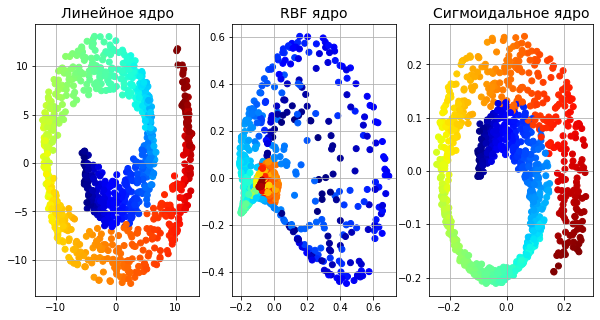

In [52]:
plt.figure(figsize=(10, 5))
for subplot, pca, title in ((131, lin_pca, "Линейное ядро"), (132, rbf_pca, "RBF ядро"), (133, sig_pca, "Сигмоидальное ядро")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.jet)

    plt.grid(True)

plt.show()

Т.к. kPCA является алгоритмом обучения без учителя, то нет никаких показателей производительности, которые могли бы помочь выбрать наилучшее ядро или значения гиперпараметров. Однако, понижение размерности обычно используется как подготовительный шаг перед тем, как передать данные алгоритму обучения с учителем. Поэтому, можно просто воспользоваться решетчатым поиском, чтобы выбрать ядро и гиперпараметры, которые приведут к наилучшей производительности на задаче.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('forest', RandomForestClassifier())
])

param_grid = [
    {
        'kpca__gamma': np.linspace(0.001, 0.04, 10),
        'kpca__kernel': ['rbf', 'sigmoid']
    }
]

In [54]:
gs = GridSearchCV(model, param_grid, cv=3)
y = t > 5
gs.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('forest', RandomForestClassifier())]),
             param_grid=[{'kpca__gamma': array([0.001     , 0.00533333, 0.00966667, 0.014     , 0.01833333,
       0.02266667, 0.027     , 0.03133333, 0.03566667, 0.04      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [55]:
gs.best_params_

{'kpca__gamma': 0.001, 'kpca__kernel': 'sigmoid'}

Другой подход, который работает без алгоритма обучения с учителем, подразумевает выбор ядра и гиперпараметров, которые в результате дают наименьшую ошибку восстановления. Но восстановление производится не так легко, как в случае линейного PCA.

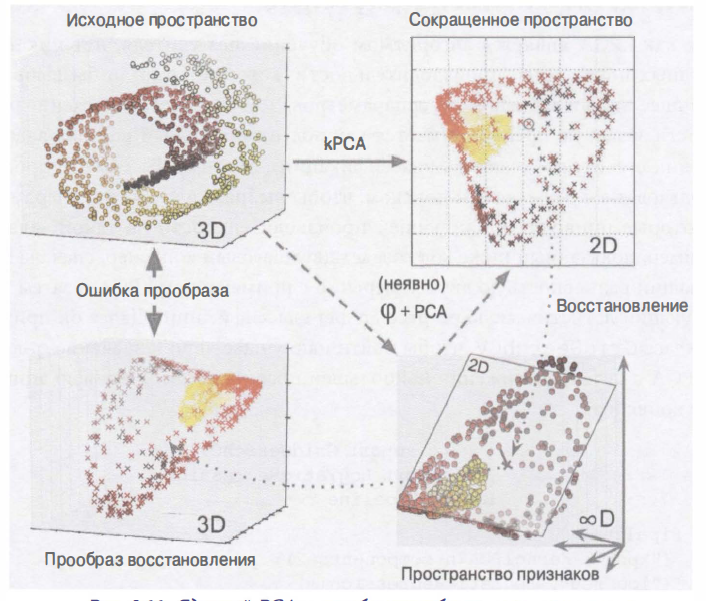

In [63]:
from IPython.display import Image
Image(data='./kpca.png')

Представим, что у нас имеется трёхмерных набор данных swiss roll и результирующий двумерный набор данных после использования kPCA с ядром RBF.

По сути, благодаря ядерному трюку, это эквивалентно отображению обучающего набора на бесконечномерное пространство признаков и последующему проецированию трансформированного обучающего набора в двумерный набор, используя линейный PCA.

Если бы всё было просто, и мы могли бы инвертировать шаг линейного PCA для заданного образца в пространстве меньшего числа измерений, то восстановленная точка находилась бы в пространстве признаков, а не в исходном пространстве. Однако, пространство признаков является бесконечномерным, а значит мы не можем вычислить восстановленную точку и, следовательно, не можем подсчитать точную ошибку восстановления. И к счастью, в исходном пространстве можно найти точку, которая будет отображаться близко к восстановленной. Это называется **прообразом** восстановления.

In [65]:
kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, fit_inverse_transform=True)
X_reduced = kpca.fit_transform(X)
X_reconstructed = kpca.inverse_transform(X_reduced)

In [66]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_reconstructed)

6.892396778834784e-22

# LLE

**Локальное линейное вложение** (locally-linear embedding - LLE) является ещё одним мощным приемом нелинейного понижения размерности.

Это методика обучения на основе многообразий, которая не полагается на проекции подобно предшествующим алгоритмам. Более кратко: LLE сначала измеряет,  как каждый обучающий образец линейно связан со своими ближайшими соседями, а затем ищет представление обучающего набора с меньшим количеством измерений, где такие связи лучше всего сохраняются.

In [67]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2)

In [66]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=6)
X_reduced = lle.fit_transform(X)

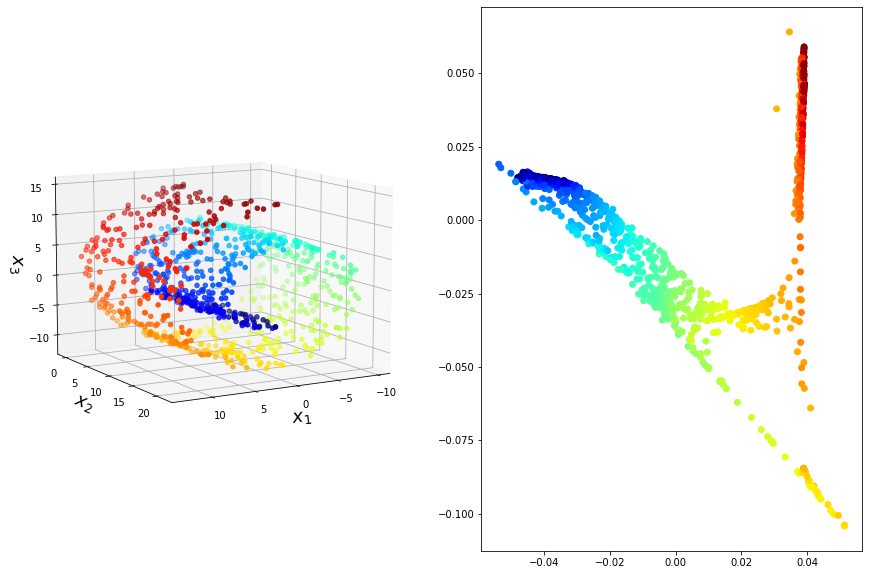

In [67]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.jet)
ax1.view_init(10, 60)
ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel("$x_2$", fontsize=18)
ax1.set_zlabel("$x_3$", fontsize=18)

ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.jet)

plt.show()

На графике выше отображен исходный датасет и результат понижения размерности с помощью LLE. Как можно заметить, датасет полностью развернут и расстояния между образцами локально хорошо сохранены. Однако, конечно, расстояния не сохраняются идеально на большом масштабе (да и многое зависит от параметра **n_neighbors**), но несмотря на это, прием LLE выполнил хорошую работу по моделированию многообразия.

Сначала для каждого обучающего образца $x^{(i)}$ алгоритм идентифицирует его **k** ближайших соседей (параметр n_neighbors) и затем пытается восстановить $x^{(i)}$ как линейную функцию этих соседей. Точнее говоря, он ищет такие веса $w_{i,j}$, чтобы квадрат расстояния между $x^{(i)}$ и $\sum_{j=1}^mw_{i,j}x^{(j)}$ был как можно меньше, при условии, что $w_{i,j}=0$, если $x^{(j)}$ не является одним из k ближайших соседей $x^{(i)}$. 

Таким образом, первым шагом LLE оказывается задача условной оптимизации:

$$\hat{W} = arg\min_W\sum_{i=1}^m\Big(x^{(i)}-\sum_{j=1}^mw_{i,j}x^{(j)}\Big)^2$$

при условии:

$$\begin{cases} 
w_{i,j}=0,\ \ \ если\ x^{(j)}\ не\ является\ одним\ из\ k\ ближайших\ соседей\ x^{(i)} \\
\sum_{j=1}^mw_{i,j}=1\ \ \ для\ i=1,2,...,m 
\end{cases}$$

Второй шаг заключается в отображении обучающих образцов на d-мерное пространство (d < n) с одновременным сохранением как можно большего числа имеющихся локальных связей.

Если $z^{(i)}$ - отражение $x^{(i)}$ в этом d-мерном пространстве, тогда мы хотим, чтобы квадрат расстояния между $z^{(i)}$ и $\sum_{j=1}^m\hat{w_{i,j}}z^{(j)}$ был насколько возможно малым. Такая задача приводит к следующей задаче оптимизации: 

$$\hat Z=arg\min_Z\sum_{i=1}^m\Big(z^{(i)}-\sum_{j=1}^m\hat{w_{i,j}}z^{(j)}\Big)^2$$

Реализация алгоритма LLE в Sklearn имеет вычислительную сложность $O(m\log(m)n\log(k))$ для нахождения k ближайших соседей, $O(mnk^3)$ для оптимизации весов и $O(dm^2)$ для построения представлений с низким числом измерений. К сожалению, наличие $m^2$ в последнем элементе делает этот алгоритм плохо масштабируемым для очень крупных наборов данных.

* MDS
* Isomap
* LDA *

In [72]:
from sklearn.manifold import MDS, TSNE, Isomap

mds = MDS()
x_mds = mds.fit_transform(X)

mds = TSNE()
x_tsne = mds.fit_transform(X)

mds = Isomap()
x_isomap = mds.fit_transform(X)

Text(0.5, 0, '$x_3$')

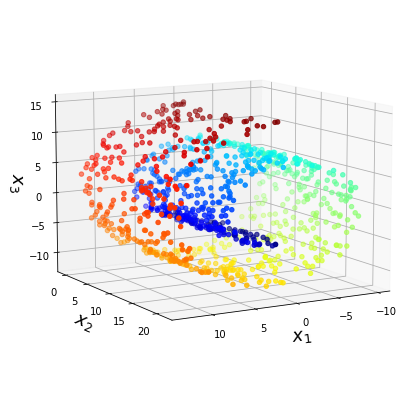

In [76]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.jet)
ax1.view_init(10, 60)
ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel("$x_2$", fontsize=18)
ax1.set_zlabel("$x_3$", fontsize=18)

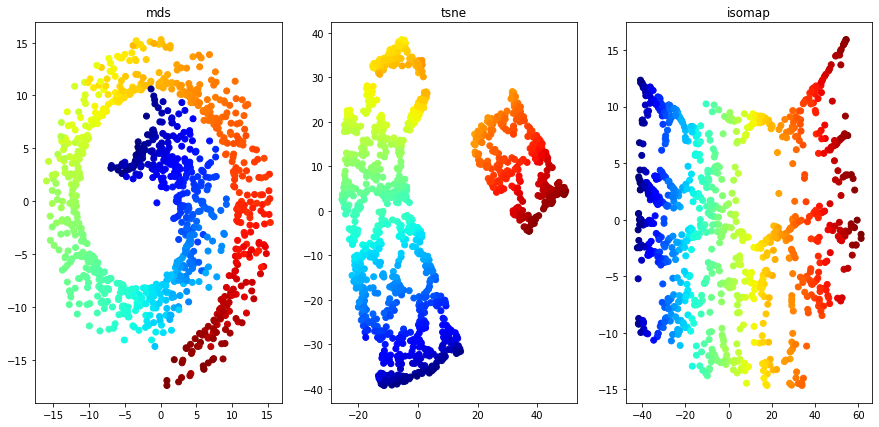

In [77]:
plt.figure(figsize=(15, 7))

plt.subplot(131)
plt.title('mds')
plt.scatter(x_mds[:, 0], x_mds[:, 1], c=t, cmap=plt.cm.jet)
plt.subplot(132)
plt.title('tsne')
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=t, cmap=plt.cm.jet)
plt.subplot(133)
plt.title('isomap')
plt.scatter(x_isomap[:, 0], x_isomap[:, 1], c=t, cmap=plt.cm.jet)

# t-SNE

**t-SNE** (t-Distributed Stochastic Neighbor Embedding) - алгоритм понижения размерности, который пытается держать похожие образцы достаточно близко друг к другу, а разные - далеко друг от друга. Чаще всего этот алгоритм используется для визуализации данных.

Давайте посмотрим как алгоритм TSNE покажет нам разбиение на кластеры датасета MNIST.

In [59]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784', as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [61]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

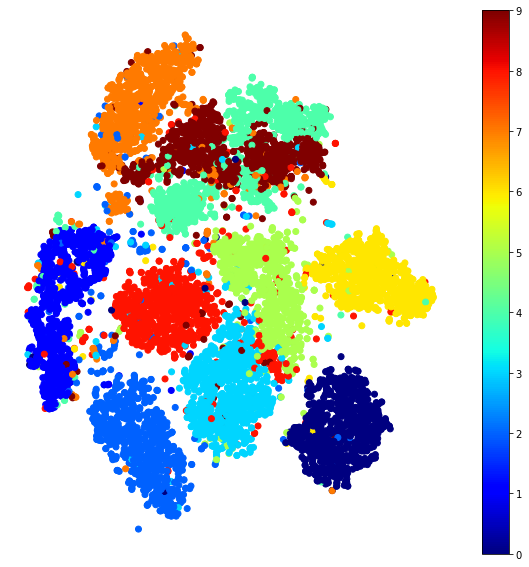

In [62]:
plt.figure(figsize=(10, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()